# Dry_beans classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_excel("C:/Users/HP/Project/Dry_Bean_Dataset.xlsx")

In [5]:
print(df.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
print(df['Class'].value_counts())

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


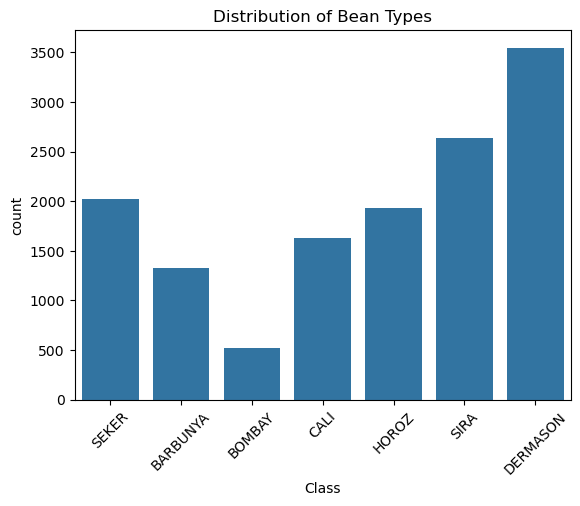

In [8]:
sns.countplot(data=df, x='Class')
plt.title("Distribution of Bean Types")
plt.xticks(rotation=45)
plt.show()

In [9]:
x= df.drop('Class', axis=1)
y= df['Class']

In [10]:
scaler = StandardScaler()

In [11]:
X_scaled = scaler.fit_transform(x)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state= 42, stratify=y)

In [13]:
X_train

array([[-0.37193594, -0.53182046, -0.69573537, ...,  1.11995234,
         1.48458867,  0.95234669],
       [ 0.02788647,  0.49711422,  0.78159933, ..., -1.32153571,
        -1.87827441,  0.15594791],
       [ 0.72515439,  0.79300959,  0.82242031, ..., -0.78729471,
        -0.23718483, -0.35726524],
       ...,
       [ 0.43507511,  0.87538709,  0.47828018, ..., -0.53478122,
        -0.01124437, -1.48949026],
       [ 0.01557532,  0.31053283,  0.64387914, ..., -1.18133001,
        -1.6159283 , -0.75403827],
       [ 4.01304919,  3.47123022,  3.51108527, ..., -1.68347212,
        -0.80760473, -0.89856953]])

In [14]:
print(df.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [15]:
print(f"Duplicates: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Duplicates: 68


In [16]:
print(df['Class'].value_counts())

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


In [17]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

🔷 Random Forest
Accuracy: 0.9188395152405435
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.89      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.93      0.93       326
    DERMASON       0.91      0.91      0.91       709
       HOROZ       0.96      0.96      0.96       386
       SEKER       0.94      0.96      0.95       406
        SIRA       0.86      0.85      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



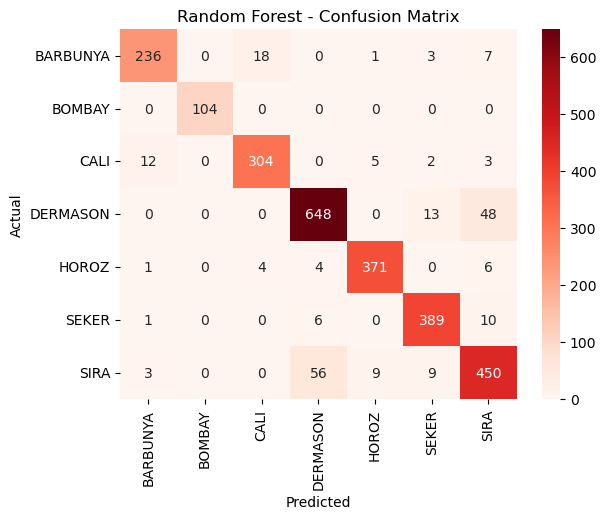

In [19]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔷 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show() 

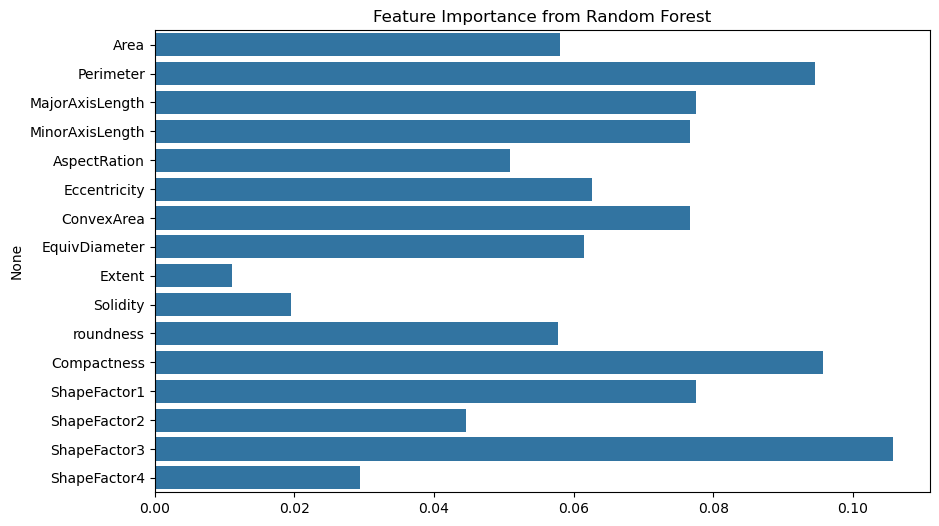

In [20]:
importances = clf.feature_importances_
features = df.columns[:-1]  # All columns except 'Class'

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression

🔷 Logistic Regression
Accuracy: 0.9210429673154609
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.94      0.94       326
    DERMASON       0.92      0.91      0.92       709
       HOROZ       0.96      0.95      0.96       386
       SEKER       0.93      0.95      0.94       406
        SIRA       0.85      0.88      0.86       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



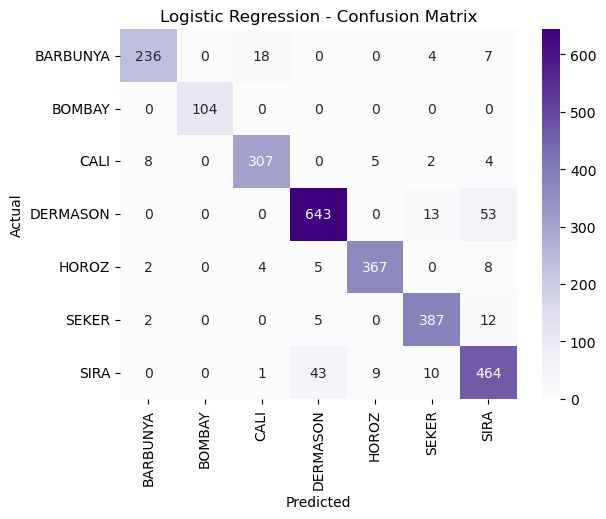

In [22]:
y_pred = clf.predict(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔷 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Purples', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier

🔷 KNN
Accuracy: 0.9170033051781123
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.88      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.94      0.93       326
    DERMASON       0.91      0.91      0.91       709
       HOROZ       0.95      0.95      0.95       386
       SEKER       0.95      0.94      0.95       406
        SIRA       0.85      0.87      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



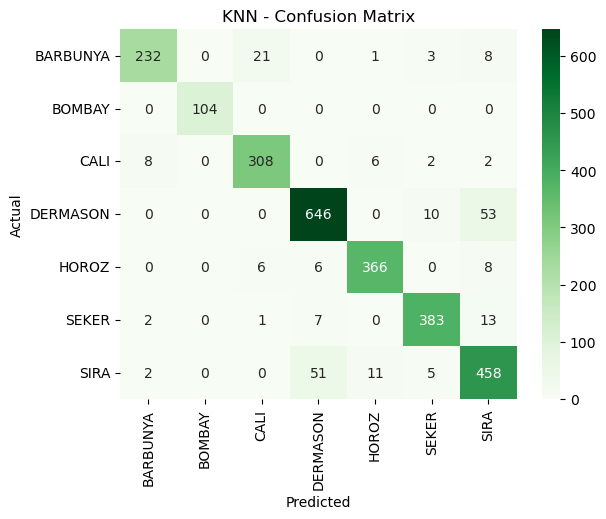

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("🔷 KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
from sklearn.svm import SVC

🔷 Support Vector Machine
Accuracy: 0.9221446933529196
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.95      0.94       326
    DERMASON       0.92      0.91      0.91       709
       HOROZ       0.96      0.96      0.96       386
       SEKER       0.94      0.95      0.94       406
        SIRA       0.86      0.87      0.87       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



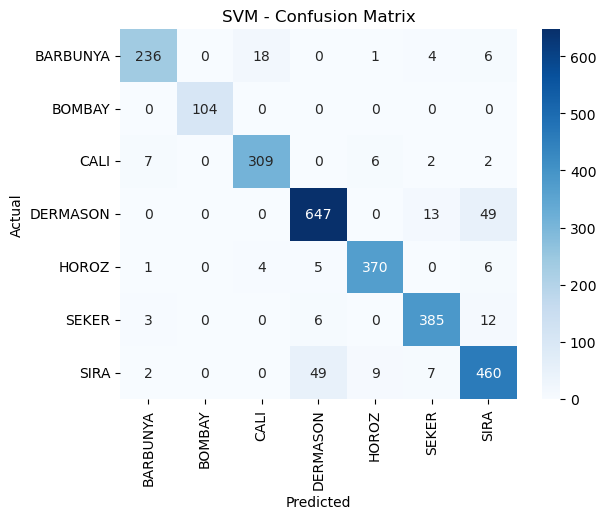

In [26]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("🔷 Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier

🔷 Decision Tree
Accuracy: 0.8920308483290489
              precision    recall  f1-score   support

    BARBUNYA       0.89      0.89      0.89       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.91      0.92       326
    DERMASON       0.89      0.88      0.89       709
       HOROZ       0.94      0.92      0.93       386
       SEKER       0.90      0.94      0.92       406
        SIRA       0.81      0.81      0.81       527

    accuracy                           0.89      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.89      0.89      2723



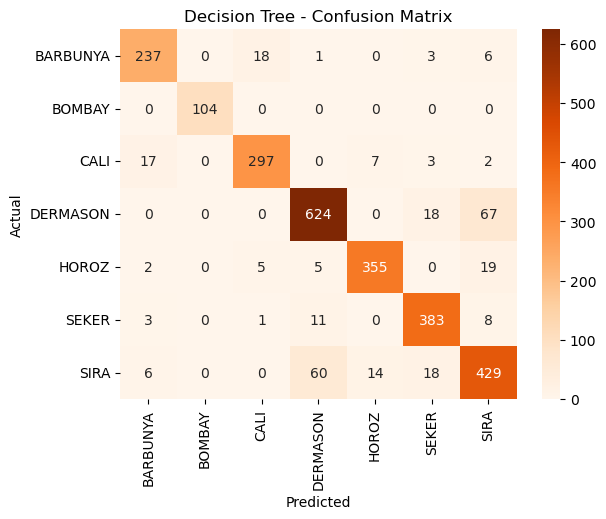

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("🔷 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
from sklearn.decomposition import PCA
# or
from sklearn.manifold import TSNE


In [30]:
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)  # Already scaled features

In [31]:
X_vis_df = pd.DataFrame(X_2D, columns=['PC1', 'PC2'])
X_vis_df['Actual'] = y.values

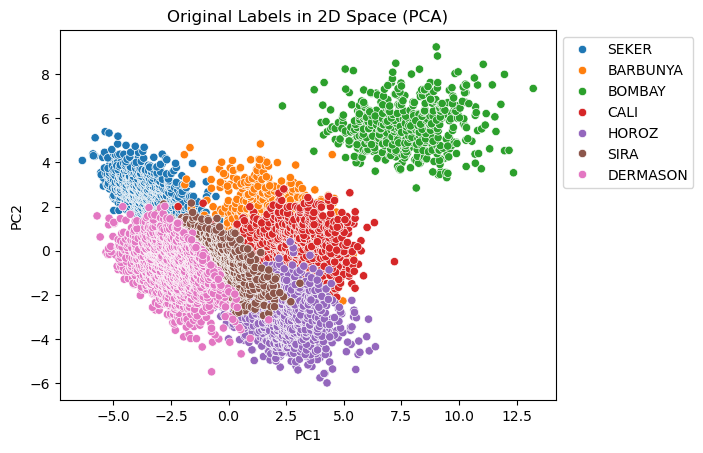

In [32]:
sns.scatterplot(data=X_vis_df, x='PC1', y='PC2', hue='Actual', palette='tab10')
plt.title("Original Labels in 2D Space (PCA)")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


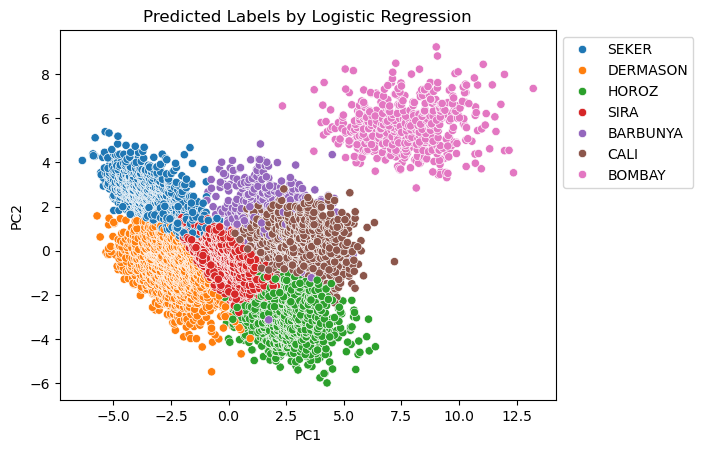

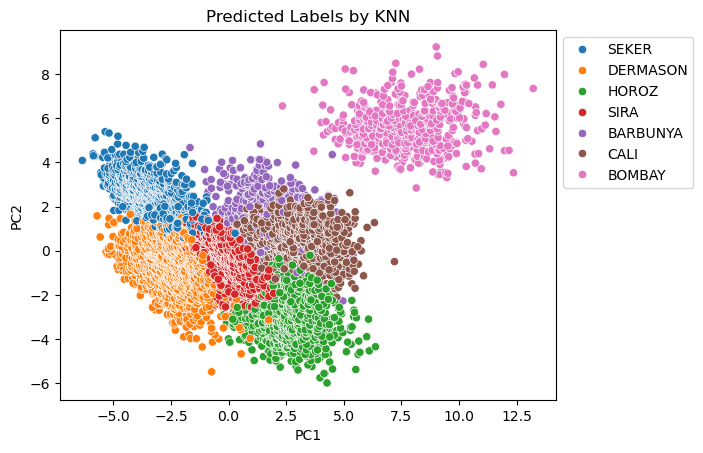

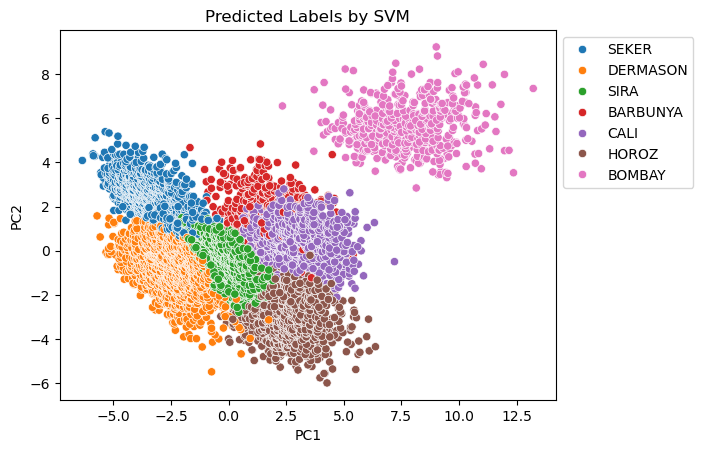

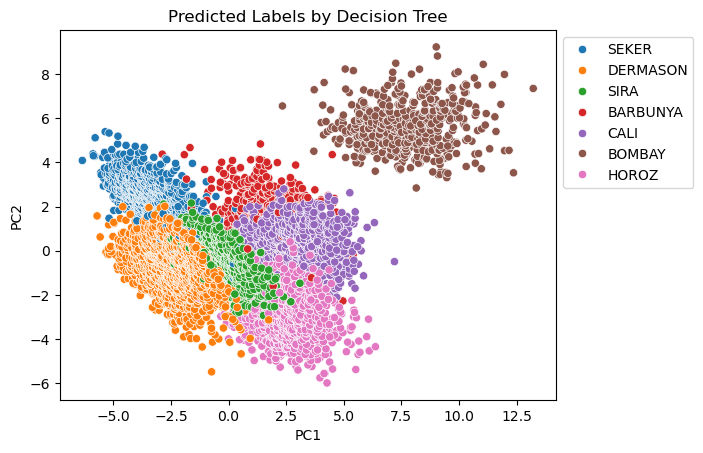

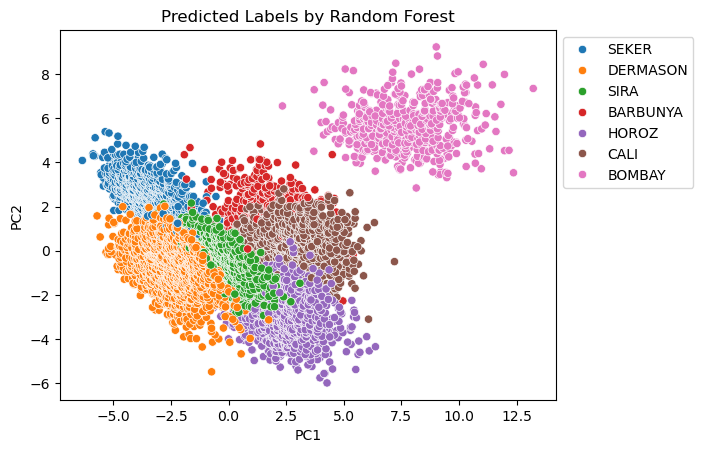

In [33]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_scaled)

    X_vis_df['Predicted'] = y_pred
    sns.scatterplot(data=X_vis_df, x='PC1', y='PC2', hue='Predicted', palette='tab10')
    plt.title(f"Predicted Labels by {name}")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9210
KNN Accuracy: 0.9170
Decision Tree Accuracy: 0.8913
Random Forest Accuracy: 0.9185
SVM Accuracy: 0.9221
